In [4]:
import pickle
import networkx as nx
from collections import defaultdict
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# Load graphs
with open("final_G", 'rb') as f1: 
    final_G = pickle.load(f1)

In [6]:
print(final_G)

MultiGraph with 429318 nodes and 1854022 edges


In [7]:
with open("Recent_comments_onAnswers", 'rb') as f2: 
    CA = pickle.load(f2)

In [8]:
print(CA)

MultiGraph with 244140 nodes and 618024 edges


In [9]:
with open("Recent_answers", 'rb') as f3: 
    A = pickle.load(f3)

In [10]:
print(A)

MultiDiGraph with 318017 nodes and 548450 edges


In [11]:
with open("Recent_comments_onQuestions", 'rb') as f4: 
    CQ = pickle.load(f4)

In [12]:
print(CQ)

MultiGraph with 227728 nodes and 687559 edges


# 2. Implementation of the backend
----
The goal of this part is the implementation of a unique system that has ... different functionalities. The program takes in input always a number i in [1,...]: given the input, the program has to run Functionality i, applied to the graph you create from the downloaded data.

## Functionality 1 - Get the overall features of the graph

It takes in input:

- One of the 3 graphs


The output should return:
- Whether the graph is directed or not
- Number of users
- Number of answers/comments
- Average number of links per user
- Density degree of the graph
- Whether the graph is sparse or dense



In [10]:
#functionality = int(input('Hello there please choose a functionality (1-3)'))
#Graph = input('Now choose one of the 3 graphs (CQ , A , CA)')
#Directed(Graph)
#Dir_or_not(Graph)


Let's create all the features for the functionality 1:


For some of the functions we created two versions : one to visualize and one to be used when called in other functions


In [11]:
def Directed(g):
    
    directed = False                     #assuming the graph is undirected
    edges = [n for n in g.edges()]       
    
    for edge in edges:                        #we are checking for every connection
        if (edge[1],edge[0]) not in edges:     #if the undirected condition holds for each pair 
            directed = True                     #if one match is not found then the graph is directed
            break
            
    return directed    

In [13]:
def Dir_or_not(g):
    
    directed = False
    edges = [n for n in g.edges()]
    
    for edge in edges:
        if (edge[1],edge[0]) not in edges:
            directed = True
            break
            
    if directed == True:
        print('The Graph is directed')
    else:
        print('The Graph is undirected')   

In [14]:
Dir_or_not(CQ)

The Graph is directed


In [15]:
def UsersandComments(g):             #here we are counting the nuber of nodes/users and edge/connections
    nodes = [n for n in g.nodes()]
    edges = [n for n in g.edges()]
    return len(nodes) , len(edges)

In [16]:
UsersandComments(CQ)[0]

227728

In [17]:
def Num_us(g):
    nodes = [n for n in g.nodes()]
    edges = [n for n in g.edges()]
    print(f'The Graph has {len(nodes)} users and {len(edges)} answers/comments')
    

In [18]:
Num_us(CQ)

The Graph has 227728 users and 687559 answers/comments


In [19]:
def linkxuser(g):                    #checking avg link per users
    
    edges = [n for n in g.edges()]
    links_dic = defaultdict(int)         #create a dictionary key = user : value = frequency of connections
    num_link = []
    
    for edge in edges:
        user = edge[0]
        links_dic[user] += 1
    
    for link in links_dic.values():      #calculating the mean
        num_link.append(link)
        
    return round(np.mean(num_link),2)

In [20]:
def Avglink(g):
    
    edges = [n for n in g.edges()]
    links_dic = defaultdict(int)
    num_link = []
    
    for edge in edges:
        user = edge[0]
        links_dic[user] += 1
    
    for link in links_dic.values():
        num_link.append(link)
        
    print(f'The average number of links per user is {round(np.mean(num_link),2)}')

In [21]:
Avglink(CQ)

The average number of links per user is 9.34


In [22]:
def Dense(g):
    nodes = len([n for n in g.nodes()])
    edges = len([n for n in g.edges()])
    
    if Directed(g):
        return (edges)/(nodes*(nodes-1))        #density formula for directed graph 
    
    else:
        return (2*edges)/(nodes*(nodes-1))      #density formula for undirected graph 

In [23]:
def Density(g):
    nodes = len([n for n in g.nodes()])
    edges = len([n for n in g.edges()])
    
    if Directed(g):
        print('The density degree of the graph is ', (edges)/(nodes*(nodes-1)))
    
    else:
        print('The density degree of the graph is ', (2*edges)/(nodes*(nodes-1)))

In [24]:
Density(CQ)

The density degree of the graph is  1.3258030516768614e-05


In [25]:
def sparsity(g):                               
    #sparsity can be ambiguos: 
    ''' graph in which the number of edges is much less than the possible number of edges.'''
    #so we setted this thresholds
     
    nodes = len([n for n in g.nodes()])
    edges = len([n for n in CQ.edges()])
    
    if Directed(g):
        max_conn = nodes*(nodes-1)
        if edges/max_conn > 0.5:
            return 'Quite dense'
        elif edges/max_conn > 0.7:
            return 'Dense'
        else :
            return 'Quite sparse'
    else:
        max_conn = (nodes*(nodes-1))/2
        if edges/max_conn > 0.5:
            return 'Quite dense'
        elif edges/max_conn > 0.7:
            return 'Dense'
        else :
            return 'Quite sparse'

In [26]:
def sparseornot(g):
    nodes = len([n for n in g.nodes()])
    edges = len([n for n in CQ.edges()])
    
    if Directed(g):
        max_conn = nodes*(nodes-1)
        if edges/max_conn > 0.5:
            print('The graph is quite dense')
        elif edges/max_conn > 0.7:
            print('The graph is dense')
        else :
            print('The graph is quite sparse')
    else:
        max_conn = (nodes*(nodes-1))/2
        if edges/max_conn > 0.5:
            print('The graph is quite dense')
        elif edges/max_conn > 0.7:
            print('The graph is dense')
        else :
            print('The graph is quite sparse')

In [27]:
sparseornot(CQ)

The graph is quite sparse


# 3. Implementation of the frontend
In this section, we ask you to build the visualizations for users’ queries results. We also expect you to showcase plots which can give us the most insight as possible and comment them accordingly.

## Visualization 1 - Visualize the overall features of the graph

Output a table with all of the information requested. The visualization should also generate a plot of the density distribution of the graph provided as input.
- Whether the graph is directed or not
- Number of users
- Number of answers/comments
- Average number of links per user
- Density degree of the graph
- Whether the graph is sparse or dense

the visual() function displays all the info about a specific graph

In [72]:
def Visual(g):
    Visualization = pd.DataFrame()
    
    Visualization['Dir or Un'] = [Directed(g)]
    Visualization['Users'] = [UsersandComments(g)[0]]
    Visualization['Answers/Comments'] = [UsersandComments(g)[1]]
    Visualization['Avg link per user'] = [linkxuser(g)]
    Visualization['Density'] = [Dense(g)]
    Visualization['Sparse/Dense'] = [sparsity(g)]
    
    
    
    def OccDict(g):
        edges = [n for n in g.edges()]
        links_dic = defaultdict(int)
    
    
        for edge in edges:
            user = edge[0]
            links_dic[user] += 1
        return links_dic
    
    mydict = OccDict(g)
    mylist = [key for key, val in mydict.items() for _ in range(val)]
    plt.hist(mylist, bins=50)
    
    
    display(Visualization)
    plt.hist(mylist, bins=50)
    
    df = pd.DataFrame([mydict])
    df = df.T
    df.hist(bins = 20)
    display(df.describe())

,Dir or Un,Users,Answers/Comments,Avg link per user,Density,Sparse/Dense
0,True,244140,618024,6.34,0.00001,Quite sparse


,0
count,97542.000000
mean,6.335978
std,24.868469
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,1693.000000


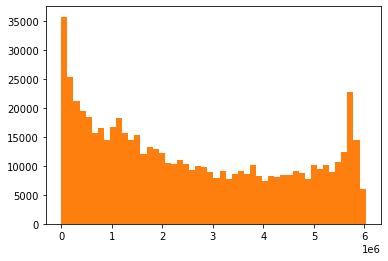

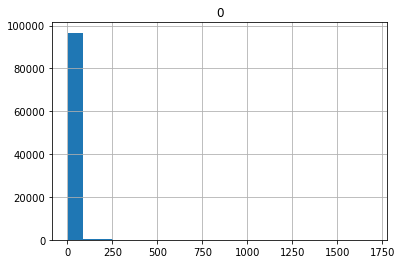

In [73]:
Visual(CA)#,Visual(CQ),Visual(A)